<a href="https://colab.research.google.com/github/pda-sedano/quantum_computing_research/blob/main/chsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Restarts kernel
# From comment on https://stackoverflow.com/a/64356932/7233512
import os
os._exit(00)

In [2]:
# Installs missing packages
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=075c454bc44e5c1496dc0bc5b62822f845fac84f451e6ec0897d217251438d5d
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c004

In [1]:
import math
import random
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [3]:
simulator = AerSimulator()

total_counts = [[0] * 4 for i in range(4)] # number of possible states

for i in range(100):

    circuit = QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

    # Prepare Bell state
    circuit.h(0) # Add Hadamard gate at qubit 0
    circuit.cx(0, 1) # Add CNOT gate with qubit 0 as control qubit and qubit 1 as target qubit

    # Determine measurement settings of the 2 detectors
    detector_1_setting = random.randrange(2)
    detector_2_setting = random.randrange(2)

    # Determines which basis to measure in
    def add_measurement(qubit, detector_setting):
        circuit.ry(math.pi / 2 * (detector_setting + qubit / 2), qubit)

    add_measurement(0, detector_1_setting)
    add_measurement(1, detector_2_setting)

    circuit.measure([0, 1], [0, 1]) # measure both qubits

    # Run simulation
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()

    counts = result.get_counts(compiled_circuit)

    for key in counts.keys():
        # Assigns each of the 4 detector setting pairs (00, 01, 10, 11) to a number from 0 to 3
        settings_index = int(str(detector_1_setting) + str(detector_2_setting), 2)
        # Assigns each of the 4 measurement outcome pairs (00, 01, 10, 11) to a number from 0 to 3
        outcome_index = int(key, 2)

        total_counts[settings_index][outcome_index] += counts[key]

print(total_counts)

# CHSH inequality test
correlations = [(total_counts[i][0] - total_counts[i][1] - total_counts[i][2] + total_counts[i][3]) / sum(total_counts[i]) for i in range(4)]
print(correlations)
correlations_sum = correlations[0] - correlations[1] + correlations[2] + correlations[3]
print(correlations_sum)

[[11062, 1903, 1884, 11151], [1791, 10416, 10113, 1680], [12886, 2183, 2254, 12677], [8514, 1430, 1444, 8612]]
[0.7086923076923077, -0.71075, 0.7042, 0.7126]
2.836242307692308


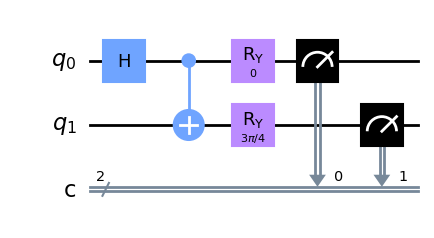

In [4]:
circuit.draw('mpl')